Importing the required libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import csv

Importing the train and test data

In [7]:
!wget https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv \ -O train_data.csv#uploaded the data on colab
!wget https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv \ -O test_data.csv
train_data_url='https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv'
train_data=pd.read_csv(train_data_url)
test_data_url='https://www.ee.iitb.ac.in/~asethi/Dump/MouseTest.csv'
test_data=pd.read_csv(test_data_url)
#test_data



--2023-03-16 03:07:23--  https://www.ee.iitb.ac.in/~asethi/Dump/MouseTrain.csv
Resolving www.ee.iitb.ac.in (www.ee.iitb.ac.in)... 103.21.125.132
Connecting to www.ee.iitb.ac.in (www.ee.iitb.ac.in)|103.21.125.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 703194 (687K) [text/csv]
Saving to: ‘MouseTrain.csv.2’

MouseTrain.csv.2    100%[===================>] 686.71K   582KB/s    in 1.2s    

2023-03-16 03:07:26 (582 KB/s) - ‘MouseTrain.csv.2’ saved [703194/703194]

--2023-03-16 03:07:26--  http://%20-o/
Resolving  -o ( -o)... failed: Name or service not known.
wget: unable to resolve host address ‘ -o’
--2023-03-16 03:07:26--  http://train_data.csv/
Resolving train_data.csv (train_data.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘train_data.csv’
--2023-03-16 03:07:26--  http://the/
Resolving the (the)... failed: Name or service not known.
wget: unable to resolve host address ‘the’
--2023-03-16 03:07:26--  http://data/
Reso

Q2)Performing which variables are usefu,and which are not by chechking the correlation matrix between the features and deletingone of the two features if both of them are highly correlated

In [8]:
train_data_filled=train_data.fillna(0)#filling all the missing values with zeroes, incase if neccesary for later use 
corr_matrix=train_data.corr().abs()#obtaining correlation of all the features among them and taking the absoulte value of it just to know which features are highly correlated
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)) #https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
#taking only the upper triangular matrix as the correlation is taken with absolute value, it is symmetric and we will be able to delete one of the two features easily
print(upper_tri)
upper_tri


           DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
DYRK1A_N        NaN  0.961321  0.407110  0.314795  0.340011  0.182126   
ITSN1_N         NaN       NaN  0.495102  0.428745  0.421034  0.149509   
BDNF_N          NaN       NaN       NaN  0.817986  0.746004  0.241501   
NR1_N           NaN       NaN       NaN       NaN  0.866667  0.185322   
NR2A_N          NaN       NaN       NaN       NaN       NaN  0.076446   
...             ...       ...       ...       ...       ...       ...   
SYP_N           NaN       NaN       NaN       NaN       NaN       NaN   
H3AcK18_N       NaN       NaN       NaN       NaN       NaN       NaN   
EGR1_N          NaN       NaN       NaN       NaN       NaN       NaN   
H3MeK4_N        NaN       NaN       NaN       NaN       NaN       NaN   
CaNA_N          NaN       NaN       NaN       NaN       NaN       NaN   

            pBRAF_N  pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N  \
DYRK1A_N   0.085401   0.158167  0.082463  0.

<ipython-input-8-ada3c13ef1cc>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool)) #https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python


,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
DYRK1A_N,NaN,0.961321,0.407110,0.314795,0.340011,0.182126,0.085401,0.158167,0.082463,0.811398,...,0.223812,0.250262,0.150564,0.358480,0.224427,0.035929,0.406055,0.324198,0.518361,0.457907
ITSN1_N,NaN,NaN,0.495102,0.428745,0.421034,0.149509,0.068712,0.114789,0.200468,0.796880,...,0.220720,0.331306,0.247760,0.299066,0.300170,0.039384,0.354554,0.403525,0.558266,0.495085
BDNF_N,NaN,NaN,NaN,0.817986,0.746004,0.241501,0.332689,0.129602,0.569146,0.458951,...,0.112984,0.279752,0.210969,0.070504,0.265185,0.454025,0.207555,0.247121,0.331191,0.304098
NR1_N,NaN,NaN,NaN,NaN,0.866667,0.185322,0.220929,0.253744,0.599846,0.399791,...,0.100915,0.434723,0.369966,0.227674,0.364487,0.486483,0.253118,0.287997,0.404977,0.205033
NR2A_N,NaN,NaN,NaN,NaN,NaN,0.076446,0.079740,0.223203,0.362348,0.387644,...,0.237932,0.486259,0.321165,0.215495,0.426562,0.377628,0.292016,0.326056,0.468892,0.185840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SYP_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.131303,0.093264,0.001912,0.273142
H3AcK18_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355167,0.744541,0.263963
EGR1_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.774110,0.487640
H3MeK4_N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.452618


Droping one of the columns(features) which are higly correlated and modifying training dataset

In [9]:

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]#https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python
#dropping the columns(features) which are highly correlated with any of the other features
to_drop_indices=[train_data.columns.get_loc(col) for col in to_drop]#taking indices of all the dropped columns(features)
to_drop_indices
train_data[to_drop]

,ITSN1_N,pERK_N,pNR1_N,pNR2B_N,BRAF_N,Bcatenin_N,pS6_N
0,0.747193,0.687906,1.022060,1.877684,0.416289,3.037621,0.106305
1,0.689064,0.695006,0.956676,1.725774,0.400364,2.921882,0.106592
2,0.730247,0.677348,1.003635,1.731873,0.399847,2.944136,0.108303
3,0.617076,0.583277,0.875390,1.566852,0.385639,2.500204,0.103184
4,0.617430,0.550960,0.864912,1.480059,0.367531,2.456560,0.104784
...,...,...,...,...,...,...,...
757,0.623696,0.467915,0.763756,1.285980,0.338002,2.107475,0.119428
758,0.659571,0.476240,0.807525,1.363664,0.350772,2.178384,0.118081
759,0.586545,0.442727,0.761818,1.274000,0.352364,1.926545,0.116134
760,0.572209,0.432371,0.723846,1.230187,0.350123,1.900317,0.120649


In [10]:
train_data_m1= train_data.drop(train_data.columns[to_drop_indices], axis=1)#dropping all the columns which are highly correlated but only the columns but not the rows with missing values
train_data_m1

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,BAD_N,BCL2_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,0.122652,NaN,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine_C/S
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,0.116682,NaN,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine_C/S
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,0.118508,NaN,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine_C/S
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,0.132781,NaN,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine_C/S
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,0.129954,NaN,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,0.156371,0.110916,0.115567,0.441207,0.148473,0.146192,0.190681,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,0.153224,0.110350,0.108944,0.444913,0.153137,0.149798,0.197944,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,0.166417,0.133664,0.114635,0.422789,0.148426,0.163649,0.191212,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,0.158631,0.136994,0.120649,0.459901,0.146872,0.140640,0.213899,1.543274,Ts65Dn,Saline_S/C


Fninding number of missing columns in each column(feature) and dropping the columns which have large missing values, I have considered the threshold as 50 and deleted all columns which have more than 50 missing values in them

In [11]:
#https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/
no_of_missing_values=train_data_m1.isna().sum()# knowing no.of missing values in each column
max_missing_values=50
cols_with_excess_missing_values=no_of_missing_values[no_of_missing_values >= max_missing_values].index.tolist()# getting columns which have more than the expected threshold of missing values
cols_with_excess_missing_values_indices=[train_data_m1.columns.get_loc(col) for col in cols_with_excess_missing_values]#getting indices of those columns with excess missing values
train_data_m2=train_data_m1.drop(train_data_m1.columns[cols_with_excess_missing_values_indices],axis=1)#dropping the columns with excess missing values
train_data_m2
miss=cols_with_excess_missing_values_indices
miss
train_data_m2#modified training data after deleting the columns with excess missing values
             # from the dataset in which already one of the each of the highly correlated columns(features) are already deleted

,DYRK1A_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,pJNK_N,...,pCASP9_N,PSD95_N,SNCA_N,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,SYP_N,CaNA_N,Genotype,Treatment_Behavior
0,0.503644,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,0.306382,...,1.603310,2.014875,0.108234,1.044979,0.831557,0.188852,0.427099,1.675652,Control,Memantine_C/S
1,0.514617,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,0.299051,...,1.671738,2.004605,0.109749,1.009883,0.849270,0.200404,0.441581,1.743610,Control,Memantine_C/S
2,0.509183,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,0.291276,...,1.663550,2.016831,0.108196,0.996848,0.846709,0.193685,0.435777,1.926427,Control,Memantine_C/S
3,0.442107,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,0.296729,...,1.484624,1.957233,0.119883,0.990225,0.833277,0.192112,0.391691,1.700563,Control,Memantine_C/S
4,0.434940,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,0.286961,...,1.534835,2.009109,0.119524,0.997775,0.878668,0.205604,0.434154,1.839730,Control,Memantine_C/S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,0.394169,0.316564,2.104045,3.314706,0.234529,0.200657,3.208804,0.221809,1.218951,0.317851,...,1.622850,2.236925,0.149263,1.136276,1.001404,0.216128,0.441207,1.474465,Ts65Dn,Saline_S/C
758,0.401739,0.321841,2.183930,3.411782,0.236546,0.190826,3.384350,0.231899,1.250487,0.329786,...,1.657617,2.274556,0.154894,1.154191,1.043402,0.209717,0.444913,1.516605,Ts65Dn,Saline_S/C
759,0.382182,0.318545,2.072000,3.073636,0.259636,0.202727,3.006364,0.223455,1.248727,0.354545,...,1.504094,2.107139,0.153154,1.195479,0.948795,0.211279,0.422789,1.433514,Ts65Dn,Saline_S/C
760,0.365622,0.297992,2.004931,2.783551,0.245333,0.190384,2.948221,0.217506,1.177527,0.325819,...,1.568203,2.212959,0.154868,1.213194,0.995884,0.197436,0.459901,1.543274,Ts65Dn,Saline_S/C


Q3) Using multivariate featureimputation, missing values are filled with the corresponding values calculated by iterative imputation in the column and later training data is updated

Also using MaxAbsScaler function, the feature values are normalized 

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.impute import IterativeImputer
imp =IterativeImputer(max_iter=20, random_state=0) #doing multivariate imputation to replace the missing values
train_data_class=['Genotype','Treatment_Behavior']#just taking classification columns
train_data_proteins=train_data_m2.drop(train_data_class,axis=1)#deleting classification columns from total dataset
train_data_columns=[column for column in train_data_proteins]
imp.fit(train_data[train_data_columns])#https://scikit-learn.org/stable/modules/impute.html
train_data_m3=imp.transform(train_data[train_data_columns])#assigning values for missing values using multivariate imputation
train_data_m3
train_data_m3.shape

scaler=MaxAbsScaler()
scaler.fit(train_data_m3)
train_data_m4=scaler.transform(train_data_m3)
train_data_m4
train_data_m4

array([[0.2001472 , 0.86526555, 0.74949371, ..., 0.52709344, 0.56227712,
        0.78676842],
       [0.20450793, 0.82824536, 0.74235772, ..., 0.55933542, 0.58134283,
        0.81867638],
       [0.20234847, 0.84139693, 0.71512974, ..., 0.54058225, 0.5737013 ,
        0.90451435],
       ...,
       [0.15187839, 0.64073044, 0.55140973, ..., 0.58968908, 0.55660221,
        0.6730773 ],
       [0.14529742, 0.5993892 , 0.53356112, ..., 0.55105411, 0.60546106,
        0.72461275],
       [0.14529074, 0.60652325, 0.54896489, ..., 0.62977249, 0.55849707,
        0.71373674]])

Now, We modified test data such that it have only the columns which are in the modified training data after multivariate feature imputation, since the columns dont much contribute in classification

Also, the test data values of features are normalized

In [95]:
from sklearn.preprocessing import MaxAbsScaler

# Find the common columns
common_columns=[col for col in train_data_m2.columns if col in test_data.columns] #common columns finding in test data such that all the features that are not contributing much are deleted
common_columns_indices=[test_data.columns.get_loc(col) for col in common_columns]#getting the indices of all the common columns(useful features)
common_columns_indices
test_data_class=['Genotype','Treatment_Behavior']
test_data_protiens=test_data.drop(test_data_class,axis=1)#getting only the features dataset
#test_data_m=test_data[common_columns]
test_data_m1=test_data[common_columns]#modifying the test data to have only the useful features
test_data_m2=test_data_m1.drop(test_data_class,axis=1)#dropping the classification columns for further computations
test_data_m3=test_data_m2.iloc[:,:].values#converting dataset intoa  2d array for computation purpose
scaler=MaxAbsScaler()
scaler.fit(test_data_m3)
test_data_m3=scaler.transform(test_data_m3)

print(test_data_m2.shape,test_data_m1.shape,test_data_m3.shape,test_data_protiens.shape)
test_data_m3

(225, 64) (225, 66) (225, 64) (225, 77)


array([[0.6325024 , 0.95086257, 0.95343627, ..., 0.64768149, 0.89945575,
        0.89554475],
       [0.65635965, 0.98916782, 0.97359723, ..., 0.68077197, 0.87407206,
        0.88957751],
       [0.64939811, 1.        , 1.        , ..., 0.69663897, 0.84457065,
        0.84937872],
       ...,
       [0.21782884, 0.51418017, 0.4329528 , ..., 0.8874332 , 0.7168076 ,
        0.61994307],
       [0.21403462, 0.50852734, 0.43815691, ..., 0.85625475, 0.65710442,
        0.60393894],
       [0.25930723, 0.61628735, 0.51703585, ..., 0.91309035, 0.66923287,
        0.63599798]])

**Q5,Q6,Q8 for binary classification**

Using five-fold cross validation in GridSearch, found reasonable(bes) hyperparameters for the following models

a)Linear SVM with regularization as hyperparameter 

b) RBF kernel SVM with kernel width and regularization as hyperparameters 

c) Neural network with single ReLU hidden layer and Softmax output (hyperparameters: number of
neurons, weight decay) 

d) Random forest (max tree depth, max number of variables per node) 

After finding the best hyperparameters for each model, feature importance of each feature is also calculated in each model using coef_,permutation_importance_,coefs_,feature_importance functions(imported from scikit learn) respectively

Then later from the optimized hyperparamters model, classification for the test data samples is predicted and it is compared with the actual test data classes and AUC score and classifciation report is obtained

Linear SVM Best Hyperparameters: {'C': 1}
Linear SVM Classification Report:
               precision    recall  f1-score   support

     Control       0.99      0.70      0.82       135
      Ts65Dn       0.69      0.99      0.81        90

    accuracy                           0.82       225
   macro avg       0.84      0.85      0.82       225
weighted avg       0.87      0.82      0.82       225

Linear SVM AUC Score 0.8462962962962963
Linear SVM cross validation results:
 {'mean_fit_time': array([0.01490674, 0.01065426, 0.00979357]), 'std_fit_time': array([0.00197702, 0.00056082, 0.00136623]), 'mean_score_time': array([0.00390882, 0.00267067, 0.00201306]), 'std_score_time': array([0.00080287, 0.00017297, 0.00041502]), 'param_C': masked_array(data=[0.1, 1, 10],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}], 'split0_test_score': array([0.62091503, 0.83006536, 0.8496732 ]), 'split1_test_score': a

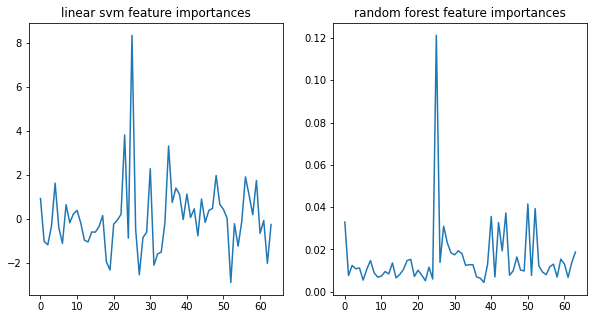

In [94]:
from sklearn.model_selection import GridSearchCV#importing all the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder


binary_class_train=train_data.iloc[:,-2]# taking all the classification columns in training and test data
four_class_train=train_data.iloc[:,-1]
binary_class_test=test_data.iloc[:,-2]
four_class_test=test_data.iloc[:,-1]

# Train a Linear SVM model with hyperparameter tuning on the training data
linear_svc_model = SVC(kernel='linear')#creating an instance of the linear Support Vector Classification (SVC) model 
param_grid_linear_svm = {'C': [0.1, 1, 10]}#regularisation hyperparameter c
linear_svc_grid = GridSearchCV(linear_svc_model, param_grid_linear_svm, cv=5)#doing gridsearch for the model using linear svm
linear_svc_grid.fit(train_data_m4,binary_class_train)#fitting a Linear Support Vector Classification (LinearSVC) model using a grid search on the
                                                  #training data (train_data_m4) with corresponding target labels (four_class_train).
linear_svc_model = linear_svc_grid.best_estimator_# getting the best estimated hyperparameters
linear_svc_cv_results=linear_svc_grid.cv_results_#getting the cross validation results for various hyperparameters
linear_svc_best_hyp=linear_svc_grid.best_params_

# Train an SVM with RBF kernel model with hyperparameter tuning on the training data
rbf_svc_model = SVC(kernel='rbf')#creating an instance of the Support Vector Classification (SVC) model with a radial basis function (RBF) kernel.
param_grid_rbf_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}#regularisation hyperparameter c and kernel width gamma
rbf_svc_grid = GridSearchCV(rbf_svc_model, param_grid_rbf_svm, cv=5)#doing gridsearch for model using svm with rbf kernel
rbf_svc_grid.fit(train_data_m4, binary_class_train)#fiitting a svc with rbf kernel model using gridsearch
rbf_svc_model = rbf_svc_grid.best_estimator_#etimating the best hyperparameters
rbf_svc_cv_results=rbf_svc_grid.cv_results_#getting the cross validation results for various hyperparameters
rbf_svc_best_hyp=rbf_svc_grid.best_params_

# Train a neural network model with hyperparameter tuning on the training data
nn_model = MLPClassifier(activation='relu', random_state=42,max_iter=10000)#creating an instance of neural network model with single RELU hidden layer
param_grid_nn = {'alpha': [0.0001, 0.001, 0.01], 'hidden_layer_sizes': [(50,), (100,), (200,)]}#number of neurons in hudden layers represented as hidden_layer_sizes 
                                                                                            #and weight decay represented as alpha
nn_grid = GridSearchCV(nn_model, param_grid_nn, cv=5)#doing gridsearch for neural network model
nn_grid.fit(train_data_m4,binary_class_train)#fiiting the model of neural network with single hidden layer uing gridsearch
nn_model = nn_grid.best_estimator_#estimating best hyperparameters
nn_cv_results=nn_grid.cv_results_#getting the cross validation results for various hyperparameters
nn_best_hyp=nn_grid.best_params_

# Train a Random Forest model with hyperparameter tuning on the training data
rf_model = RandomForestClassifier(random_state=42)#creating an instance of random forest model
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5,10,20]}#maximum no.of variables per node represented as n_estimators 
                                                                     # mximum tree depth represented as max_depth
rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5)#doing gridsearch on randomforest model
rf_grid.fit(train_data_m4,binary_class_train)#fitting the model of randomforest using gridsearch
rf_model = rf_grid.best_estimator_#estimating the best hyperparameters
rf_cv_results=rf_grid.cv_results_#getting the cross validation results for various hyperparameters
rf_best_hyp=rf_grid.best_params_


#getting best features for all the models
linear_svc_best_fea=linear_svc_model.coef_
rbf_svc_best_fea=permutation_importance(rbf_svc_grid, train_data_m4, binary_class_train, n_repeats=10, random_state=0)
nn_best_fea= nn_model.coefs_[0]
rf_best_fea = rf_model.feature_importances_


# Test the models on the testing data
linear_svc_y_pred = linear_svc_model.predict(test_data_m3)#testing and predicting the testdata on all four models
rbf_svc_y_pred = rbf_svc_model.predict(test_data_m3)
nn_y_pred = nn_model.predict(test_data_m3)
rf_y_pred = rf_model.predict(test_data_m3)


#converting classes into labels for calculating AUC score in binary classification
le = LabelEncoder()
bi_cls_tr_en=le.fit_transform(binary_class_train)
bi_cls_te_en=le.fit_transform(binary_class_test)
#bi_cls_tr_en=le.fit_transform(binary_class_train)
#bi_cls_tr_en=le.fit_transform(binary_class_train)
li_svc_y_pred_en=le.fit_transform(linear_svc_y_pred)
rbf_svc_y_pred_en=le.fit_transform(rbf_svc_y_pred)
nn_y_pred_en=le.fit_transform(nn_y_pred)
rf_y_pred_en=le.fit_transform(rf_y_pred)


# Print the best hyperparameters and the classification report for each model
print("Linear SVM Best Hyperparameters:", linear_svc_grid.best_params_)
print("Linear SVM Classification Report:\n", classification_report(binary_class_test, linear_svc_y_pred))
print("Linear SVM AUC Score",roc_auc_score(bi_cls_te_en,li_svc_y_pred_en))
print("Linear SVM cross validation results:\n",linear_svc_cv_results)
print("SVM with RBF Kernel Best Hyperparameters:", rbf_svc_grid.best_params_)
print("SVM with RBF Kernel Classification Report:\n", classification_report(binary_class_test, rbf_svc_y_pred))
print("SVM with RBF Kernel AUC Score",roc_auc_score(bi_cls_te_en,rbf_svc_y_pred_en))
print("SVM with RBF Kernel cross validation results:\n",rbf_svc_cv_results)
print("Neural Network Best Hyperparameters:", nn_grid.best_params_)
print("Neural Network Classification Report:\n", classification_report(binary_class_test, nn_y_pred))
print("Neural Network AUC Score",roc_auc_score(bi_cls_te_en,nn_y_pred_en))
print("Neural Network cross validaion results:\n",nn_cv_results)
print("Random Forest Best Hyperparameters:", rf_grid.best_params_)
print("Random Forest Classification AUC Score",roc_auc_score(bi_cls_te_en,rf_y_pred_en))
print("Random Forest cross validation results:\n",rf_cv_results)
print("Feature importance in Linear SVM:\n",linear_svc_best_fea)
print("Feature importance in SVM with RBF Kernel:\n",rbf_svc_best_fea)
print("Feature importance in Neural Network:\n",nn_best_fea)
print("Feature importance in Random Forest Classification:\n",rf_best_fea)
lin_svc_best_fea_flat = [item for sublist in linear_svc_best_fea for item in sublist]

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot first plot on first subplot
axs[0].plot(range(len(lin_svc_best_fea_flat)), lin_svc_best_fea_flat)
axs[0].set_title('linear svm feature importances')

# plot second plot on second subplot
axs[1].plot(range(len(rf_best_fea)), rf_best_fea)
axs[1].set_title('random forest feature importances')

plt.show()



**Q5,Q6,Q8** for four classes classification

Similar to the above mentioned process, same is done with this classification except that the there are four different classes that are compared

We use accuracy as the measure for multivariable classification, which is th optimum metric to consider in this case

And later, from the optimized hyperparamters model, classification for the test data samples is predicted and it is compared with the actual test data classes and AUC score and classifciation report is obtained

Linear SVM Best Hyperparameters: {'C': 10}
Linear SVM Classification Report:
                precision    recall  f1-score   support

Memantine_C/S       0.82      0.55      0.66        60
Memantine_S/C       0.79      1.00      0.88        60
   Saline_C/S       0.66      0.88      0.76        60
   Saline_S/C       1.00      0.64      0.78        45

     accuracy                           0.78       225
    macro avg       0.82      0.77      0.77       225
 weighted avg       0.81      0.78      0.77       225

SVM with RBF Kernel Best Hyperparameters: {'C': 10, 'gamma': 'scale'}
SVM with RBF Kernel Classification Report:
                precision    recall  f1-score   support

Memantine_C/S       0.50      0.10      0.17        60
Memantine_S/C       0.79      1.00      0.88        60
   Saline_C/S       0.50      0.90      0.64        60
   Saline_S/C       1.00      0.64      0.78        45

     accuracy                           0.66       225
    macro avg       0.70      0.6

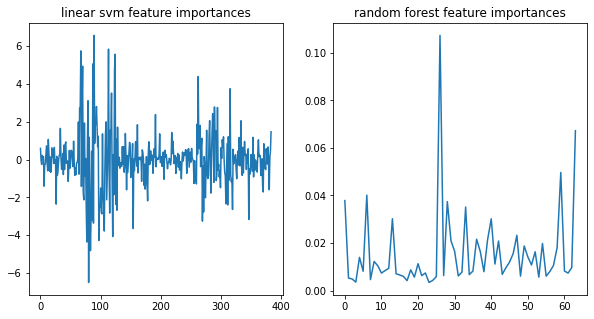

In [85]:
from sklearn.model_selection import GridSearchCV#importing all the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

binary_class_train=train_data.iloc[:,-2]# taking all the classification columns in training and test data
four_class_train=train_data.iloc[:,-1]
binary_class_test=test_data.iloc[:,-2]
four_class_test=test_data.iloc[:,-1]

# Train a Linear SVM model with hyperparameter tuning on the training data
linear_svc_model =SVC(kernel='linear')#creating an instance of the linear Support Vector Classification (SVC) model
param_grid_linear_svm = {'C': [0.1, 1, 10]}#regularisation hyperparameter c 
linear_svc_grid = GridSearchCV(linear_svc_model, param_grid_linear_svm, cv=5)#doing gridsearch for the model using linear svm
linear_svc_grid.fit(train_data_m4,four_class_train)#fitting a Linear Support Vector Classification (LinearSVC) model using a grid search on the
                                                  #training data (train_data_m4) with corresponding target labels (four_class_train).
linear_svc_model = linear_svc_grid.best_estimator_# getting the best estimated hyperparameters
linear_svc_cv_results=linear_svc_grid.cv_results_#getting the cross validation results for various hyperparameters
linear_svc_best_hyp=linear_svc_grid.best_params_

# Train an SVM with RBF kernel model with hyperparameter tuning on the training data
rbf_svc_model = SVC(kernel='rbf')#creating an instance of the Support Vector Classification (SVC) model with a radial basis function (RBF) kernel.
param_grid_rbf_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}#regularisation hyperparameter c and kernel width gamma
rbf_svc_grid = GridSearchCV(rbf_svc_model, param_grid_rbf_svm, cv=5)#doing gridsearch for model using svm with rbf kernel
rbf_svc_grid.fit(train_data_m4, four_class_train)#fiitting a svc with rbf kernel model using gridsearch
rbf_svc_model = rbf_svc_grid.best_estimator_#etimating the best hyperparameters
rbf_svc_cv_results=rbf_svc_grid.cv_results_#getting the cross validation results for various hyperparameters
rbf_svc_best_hyp=rbf_svc_grid.best_params_

# Train a neural network model with hyperparameter tuning on the training data
nn_model = MLPClassifier(activation='relu', random_state=42,max_iter=10000)#creating an instance of neural network model with single RELU hidden layer
param_grid_nn = {'alpha': [0.0001, 0.001, 0.01], 'hidden_layer_sizes': [(50,), (100,), (200,)]}#number of neurons in hudden layers represented as hidden_layer_sizes 
                                                                                            #and weight decay represented as alpha
nn_grid = GridSearchCV(nn_model, param_grid_nn, cv=5)#doing gridsearch for neural network model
nn_grid.fit(train_data_m4,four_class_train)#fiiting the model of neural network with single hidden layer uing gridsearch
nn_model = nn_grid.best_estimator_#estimating best hyperparameters
nn_cv_results=nn_grid.cv_results_#getting the cross validation results for various hyperparameters
nn_best_hyp=nn_grid.best_params_

# Train a Random Forest model with hyperparameter tuning on the training data
rf_model = RandomForestClassifier(random_state=42)#creating an instance of random forest model
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5,10,20]}#maximum no.of variables per node represented as n_estimators 
                                                                     # mximum tree depth represented as max_depth
rf_grid = GridSearchCV(rf_model, param_grid_rf, cv=5)#doing gridsearch on randomforest model
rf_grid.fit(train_data_m4,four_class_train)#fitting the model of randomforest using gridsearch
rf_model = rf_grid.best_estimator_#estimating the best hyperparameters
rf_cv_results=rf_grid.cv_results_#getting the cross validation results for various hyperparameters
rf_best_hyp=rf_grid.best_params_

#getting feature importance in all the models
linear_svc_best_fea=linear_svc_model.coef_
rbf_svc_best_fea=permutation_importance(rbf_svc_grid, train_data_m4, binary_class_train, n_repeats=10, random_state=0)
nn_best_fea= nn_model.coefs_[0]
rf_best_fea = rf_model.feature_importances_

# Test the models on the testing data
linear_svc_y_pred = linear_svc_model.predict(test_data_m3)#testing and predicting the testdata on all four models
rbf_svc_y_pred = rbf_svc_model.predict(test_data_m3)
nn_y_pred = nn_model.predict(test_data_m3)
rf_y_pred = rf_model.predict(test_data_m3)


# Print the best hyperparameters and the classification report for each model
print("Linear SVM Best Hyperparameters:", linear_svc_grid.best_params_)
print("Linear SVM Classification Report:\n", classification_report(four_class_test, linear_svc_y_pred))
print("SVM with RBF Kernel Best Hyperparameters:", rbf_svc_grid.best_params_)
print("SVM with RBF Kernel Classification Report:\n", classification_report(four_class_test, rbf_svc_y_pred))
print("Neural Network Best Hyperparameters:", nn_grid.best_params_)
print("Neural Network Classification Report:\n", classification_report(four_class_test, nn_y_pred))
print("Random Forest Best Hyperparameters:", rf_grid.best_params_)
print("Random Forest Classification Report:\n", classification_report(four_class_test, rf_y_pred))
print("Feature importance in Linear SVM:\n",linear_svc_best_fea)
print("Feature importance in SVM with RBF Kernel:\n",rbf_svc_best_fea)
print("Feature importance in Neural Network:\n",nn_best_fea)
print("Feature importance in Random Forest Classification:\n",rf_best_fea)
lin_svc_best_fea_flat = [item for sublist in linear_svc_best_fea for item in sublist]

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# plot first plot on first subplot
axs[0].plot(range(len(lin_svc_best_fea_flat)), lin_svc_best_fea_flat)
axs[0].set_title('linear svm feature importances')

# plot second plot on second subplot
axs[1].plot(range(len(rf_best_fea)), rf_best_fea)
axs[1].set_title('random forest feature importances')

plt.show()

**Q7**

Obtaining important features(best features) from the models for Linear SVM and RandomForestClassifier, We won't be able to get best features for SVM with RBF kernel and Neural Networks with single ReLU hidden layer and Softmax output from RFECV function, since they does compute and obtain any best features 

In [93]:
from sklearn.datasets import make_friedman1
from sklearn.metrics import f1_score
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

linear_svm_best_fr=SVC(kernel='linear',C=10)
rfecv_linear_svm_fr=RFECV(estimator=linear_svm_best_fr,step=1, cv=5, scoring='accuracy')
rfecv_linear_svm_fr.fit(train_data_m4,four_class_train)
rfecv_linear_svm_fr.support_

linear_svm_best_bi=SVC(kernel='linear',C=10)
rfecv_linear_svm_bi=RFECV(estimator=linear_svm_best_bi, step=1, cv=5, scoring='accuracy')
rfecv_linear_svm_bi.fit(train_data_m4,four_class_train)
rfecv_linear_svm_bi.support_

rf_svm_best_bi=RandomForestClassifier(n_estimators=100,max_depth=10)
rfecv_rf_svm_bi=RFECV(estimator=rf_svm_best_bi,step=1,cv=5,scoring='accuracy')
rfecv_rf_svm_bi.fit(train_data_m4,binary_class_train)
rfecv_rf_svm_bi.support_


rf_svm_best_fr=RandomForestClassifier(n_estimators=200,max_depth=10)
rfecv_rf_svm_fr=RFECV(estimator=rf_svm_best_fr,step=1,cv=5,scoring='accuracy')
rfecv_rf_svm_fr.fit(train_data_m4,binary_class_train)
rfecv_rf_svm_fr.support_
print("best features linear svm in binary classification:\n",rfecv_linear_svm_bi.support_)
print("best features linear svm in four classification:\n",rfecv_linear_svm_fr.support_)
print("best features randomforest in binary classification:\n",rfecv_rf_svm_bi.support_)
print("best features randomforest in four classification:\n",rfecv_rf_svm_fr.support_)
#rf_best=RandomForestClassifier()


best features linear svm in binary classification:
 [ True  True  True  True False  True  True False  True  True False False
  True  True False  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True False False  True False  True
 False  True  True False  True  True  True False False  True  True False
 False  True  True  True  True False  True  True  True False  True  True
  True  True False  True]
best features linear svm in four classification:
 [ True  True  True  True False  True  True False  True  True False False
  True  True False  True  True False  True  True  True False  True  True
  True  True  True  True  True  True  True False False  True False  True
 False  True  True False  True  True  True False False  True  True False
 False  True  True  True  True False  True  True  True False  True  True
  True  True False  True]
best features randomforest in binary classification:
 [ True  True  True  True  True False  True  True  True False F

Objective 2
Q9)Importing the hymenoptera_data_folder

Import required libraries

In [25]:
# License: BSD
# Author: Sasank Chilamkurthy

from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

cudnn.benchmark = True
plt.ion()   # interactive mode

Load the data 
Normalization and Agumentation of the data



In [26]:
!wget "https://download.pytorch.org/tutorial/hymenoptera_data.zip"


--2023-03-16 04:21:09--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 99.84.203.29, 99.84.203.35, 99.84.203.121, ...
Connecting to download.pytorch.org (download.pytorch.org)|99.84.203.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip’

hymenoptera_data.zi 100%[===================>]  45.10M  66.9MB/s    in 0.7s    

2023-03-16 04:21:10 (66.9 MB/s) - ‘hymenoptera_data.zip’ saved [47286322/47286322]



In [27]:

!unzip hymenoptera_data.zip

Archive:  hymenoptera_data.zip
   creating: hymenoptera_data/
   creating: hymenoptera_data/train/
   creating: hymenoptera_data/train/ants/
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/147318

In [28]:

# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),#augmentation of data
        transforms.RandomHorizontalFlip(),#augmentation of data
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Function to visualize a few images

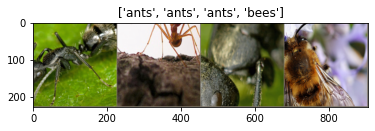

In [29]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training model with ResNet as Fixed Feature Extractor

Loading pretrained ResNet model for feature extraction

In [30]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

Function for training the models

In [31]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [89]:
model_ft = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler,
                       num_epochs=5)

Epoch 0/4
----------
train Loss: 0.3212 Acc: 0.8566
val Loss: 0.2201 Acc: 0.9085

Epoch 1/4
----------
train Loss: 0.3188 Acc: 0.8443
val Loss: 0.1730 Acc: 0.9346

Epoch 2/4
----------
train Loss: 0.3565 Acc: 0.8525
val Loss: 0.1720 Acc: 0.9412

Epoch 3/4
----------
train Loss: 0.3636 Acc: 0.8320
val Loss: 0.1757 Acc: 0.9542

Epoch 4/4
----------
train Loss: 0.3161 Acc: 0.8689
val Loss: 0.1979 Acc: 0.9216

Training complete in 3m 18s
Best val Acc: 0.954248


Function to visualize the predictions of model for few images

In [33]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)


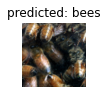

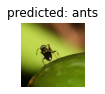

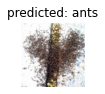

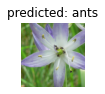

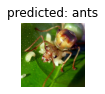

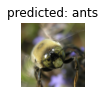

In [34]:
visualize_model(model_conv)
plt.ioff()
plt.show()

Function to extract the ResNet18 features for a given input image

In [35]:
pretrained_model= torchvision.models.resnet18(pretrained=True)#load resnet model
last_layer=pretrained_model._modules.get('avgpool')#avgpool is at the end of resnet
pretrained_model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [80]:
from PIL import Image
from torchvision import transforms
import torch
transform=transforms.Compose([
     transforms.Resize((22,224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.48,0.46,0.47],
                               std=[0.22,0.29,0.27])
])

def getfeatures(image_name):
  image=Image.open(image_name)
  #converting image by normalizeing, and using totensor
  final_image=transform(image).unsqueeze(0)
  feature_vector=torch.Tensor(512).fillna_(0)#vector of zeroes holding feature vector
  def copy_data(a,b,c):
    feature_vector.copy_(c.data.reshape(c.data.size(1)))
  attachment=last_layer.register_forward_hook(copy_data)#attach the function to the layer
  pretrained_model(final_image)#run the model on the transoformed image
  attachment.remove()#remove our copy function from the layer
  return feature_vector.detach().cpu().numpy()


#https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

All the references and explainations for the code are mentioned near the code itself

Took some ideas for coding in objective 2 from Prajwal Kalpande(roll number :200070028)

link for my recording - https://drive.google.com/file/d/159mhFxSB5aROHirijtOsyBiZ2GRR6lkJ/view?usp=sharing